In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install --quiet gdown ultralytics

import os, zipfile, random, shutil
import gdown
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

# 1) Download & unzip
for url, out in [
    ("https://drive.google.com/file/d/1Yp0If_pGQyOSVaOFUS5piLypDuLiO5tK/view?usp=share_link", "preliminary.zip"),
    ("https://drive.google.com/file/d/1nQBjcg6-sU3yOxMzi0ybTwpQx4H5xuV0/view?usp=share_link", "object_detection.zip"),
    ("https://drive.google.com/file/d/1sd7diZGvNW3-BO0LnYqmTdaCdZKgToJp/view?usp=share_link", "segmentation.zip"),
]:
    print(f"Downloading {out} …")
    gdown.download(url, out, fuzzy=True)
    print(f"Unzipping {out} …")
    with zipfile.ZipFile(out, 'r') as z:
        z.extractall(out.replace('.zip',''))
    print()

# 2) Clone just to pull in your annotation files
!git clone https://github.com/abdulwahabamin/keras-yolo3-attention.git
%cd keras-yolo3-attention

# 3) Load class names
with open("model_data/garbage_classes.txt") as f:
    class_names = [l.strip() for l in f if l.strip()]
print(f"{len(class_names)} classes → {class_names}")

# 4) Parse the annotation file
image_annotations = []
with open("annot_labels.txt") as f:
    for line in f:
        parts = line.strip().split()
        if not parts: continue
        img_rel, *boxes = parts
        bbs = [tuple(map(int, b.split(','))) for b in boxes]
        image_annotations.append({"img_path": img_rel, "bboxes": bbs})
print(f"Parsed {len(image_annotations)} entries")



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.3/981.3 kB 17.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 28.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.2 MB/s eta 0:00:00:00:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pylibcugraph-cu12 24.12.0 requires pylibraft-cu12==24.12.*, but you have pylibraft-cu12 25.2.0 

Downloading...
From (original): https://drive.google.com/uc?id=1Yp0If_pGQyOSVaOFUS5piLypDuLiO5tK
From (redirected): https://drive.google.com/uc?id=1Yp0If_pGQyOSVaOFUS5piLypDuLiO5tK&confirm=t&uuid=f2083a58-c0c1-4c5f-a913-ae1256666af2
To: /kaggle/working/preliminary.zip
100%|██████████| 522M/522M [00:04<00:00, 111MB/s]  


Unzipping preliminary.zip …



Downloading...
From (original): https://drive.google.com/uc?id=1nQBjcg6-sU3yOxMzi0ybTwpQx4H5xuV0
From (redirected): https://drive.google.com/uc?id=1nQBjcg6-sU3yOxMzi0ybTwpQx4H5xuV0&confirm=t&uuid=afcf2620-99c1-4397-8fce-aa8cbad76016
To: /kaggle/working/object_detection.zip
100%|██████████| 2.91G/2.91G [00:15<00:00, 183MB/s] 


Unzipping object_detection.zip …



Downloading...
From (original): https://drive.google.com/uc?id=1sd7diZGvNW3-BO0LnYqmTdaCdZKgToJp
From (redirected): https://drive.google.com/uc?id=1sd7diZGvNW3-BO0LnYqmTdaCdZKgToJp&confirm=t&uuid=a095ba6e-b8ed-4448-a7bb-d3a1b3547919
To: /kaggle/working/segmentation.zip
100%|██████████| 1.72G/1.72G [00:11<00:00, 152MB/s] 


Unzipping segmentation.zip …

Cloning into 'keras-yolo3-attention'...
remote: Enumerating objects: 122, done.
remote: Counting objects: 100% (122/122), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 122 (delta 51), reused 100 (delta 29), pack-reused 0 (from 0)
Receiving objects: 100% (122/122), 9.29 MiB | 21.32 MiB/s, done.
Resolving deltas: 100% (51/51), done.
/kaggle/working/keras-yolo3-attention
12 classes → ['plastic_bag', 'plastic_wrapper', 'plastic_bottle', 'plastic_cap', 'shoes', 'decor', 'cigarette', 'paper_wrapper', 'cardboard', 'tetrapak', 'cluster', 'other']
Parsed 12650 entries


In [3]:
# 5) **Recursively** copy every JPEG from the unzipped train folder into `images/`
raw_jpegs = Path("/kaggle/working/object_detection/WaterTrash_ObjectDetection_LUMS2021_v1/JPEGImages")
images_dir = Path("images")
if images_dir.exists(): shutil.rmtree(images_dir)
shutil.copytree(raw_jpegs, images_dir)  # copies everything, including .JPG/.jpg

# 6) Remap every annotation to point into our new `images/` folder
for ann in image_annotations:
    ann["img_path"] = str(images_dir / Path(ann["img_path"]).name)

# Quick sanity check
print("First 5 mapped paths:")
for a in image_annotations[:5]:
    print(" ", a["img_path"])

random.seed(42)
random.shuffle(image_annotations)
split = int(0.8 * len(image_annotations))
train_data = image_annotations[:split]
val_data   = image_annotations[split:]
print(f"Train: {len(train_data)}   Val: {len(val_data)}")


First 5 mapped paths:
  images/artificial_0.jpg
  images/artificial_1.jpg
  images/artificial_10.jpg
  images/artificial_100.jpg
  images/artificial_1000.jpg
Train: 10120   Val: 2530


In [4]:
from pathlib import Path
import shutil, cv2

base = Path('data')
for mode in ('train','val'):
    (base/mode).mkdir(parents=True, exist_ok=True)
    (base/'labels'/mode).mkdir(parents=True, exist_ok=True)

def prep_split(annotations, mode):
    for ann in annotations:
        src = Path(ann['img_path'])
        dst_img = base/mode/src.name
        shutil.copy(src, dst_img)
        # get size
        h, w = cv2.imread(str(src)).shape[:2]
        lines = []
        for x1,y1,x2,y2,c in ann['bboxes']:
            xc = ((x1+x2)/2)/w
            yc = ((y1+y2)/2)/h
            bw = (x2-x1)/w
            bh = (y2-y1)/h
            lines.append(f"{c} {xc:.6f} {yc:.6f} {bw:.6f} {bh:.6f}")
        (base/'labels'/mode/f"{src.stem}.txt").write_text("\n".join(lines))

prep_split(train_data, 'train')
prep_split(val_data,   'val')
print("✔ data/ ready: images/train, images/val, labels/train, labels/val")


✔ data/ ready: images/train, images/val, labels/train, labels/val


In [5]:

%%writefile /kaggle/working/keras-yolo3-attention/data/garbage.yaml
# data/garbage.yaml

train: /kaggle/working/keras-yolo3-attention/data/images/train
val:   /kaggle/working/keras-yolo3-attention/data/images/val

nc: 12

names:
  0: plastic_bag
  1: plastic_wrapper
  2: plastic_bottle
  3: plastic_cap
  4: shoes
  5: decor
  6: cigarette
  7: paper_wrapper
  8: cardboard
  9: tetrapak
  10: cluster
  11: other



Writing /kaggle/working/keras-yolo3-attention/data/garbage.yaml


In [6]:
import ultralytics
from ultralytics import YOLO

print("YOLOv8 version:", ultralytics.__version__)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
YOLOv8 version: 8.3.112


In [7]:
# start from a tiny pre‑trained checkpoint
model = YOLO('yolov8n.pt')
model.info()


100%|██████████| 6.25M/6.25M [00:00<00:00, 85.9MB/s]


YOLOv8n summary: 129 layers, 3,157,200 parameters, 0 gradients, 8.9 GFLOPs


(129, 3157200, 0, 8.8575488)

In [8]:
!mkdir -p data/images/train data/images/val
!mv data/train/* data/images/train/
!mv data/val/*   data/images/val/


In [9]:
results = model.train(
    data='data/garbage.yaml',
    epochs=20,
    imgsz=416,
    batch=8,
    workers=4,
    project='runs/train',
    name='garbage_v8n',
    device=0
)


Ultralytics 8.3.112 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data/garbage.yaml, epochs=20, time=None, patience=100, batch=8, imgsz=416, save=True, save_period=-1, cache=False, device=0, workers=4, project=runs/train, name=garbage_v8n, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, 

100%|██████████| 755k/755k [00:00<00:00, 17.7MB/s]


Overriding model.yaml nc=80 with nc=12

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 76.3MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2878.5±819.0 MB/s, size: 252.9 KB)


train: Scanning /kaggle/working/keras-yolo3-attention/data/labels/train... 10120 images, 0 backgrounds, 1 corrupt: 100%|██████████| 10120/10120 [00:08<00:00, 1206.38it/s]

train: /kaggle/working/keras-yolo3-attention/data/images/train/artificial_2295.jpg: 1 duplicate labels removed
train: /kaggle/working/keras-yolo3-attention/data/images/train/itu_4577.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.1906]


train: New cache created: /kaggle/working/keras-yolo3-attention/data/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1573.2±973.0 MB/s, size: 233.4 KB)


val: Scanning /kaggle/working/keras-yolo3-attention/data/labels/val... 2530 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2530/2530 [00:02<00:00, 1031.78it/s]


val: New cache created: /kaggle/working/keras-yolo3-attention/data/labels/val.cache
Plotting labels to runs/train/garbage_v8n/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000625, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 4 dataloader workers
Logging results to runs/train/garbage_v8n
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20     0.561G      1.782       2.28     0.9245         30        416: 100%|██████████| 1265/1265 [02:29<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 159/159 [00:25<00:00,  6.27it/s]


                   all       2530       9064      0.747      0.162      0.187      0.116

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20     0.572G      1.677       1.45     0.9067         39        416: 100%|██████████| 1265/1265 [02:20<00:00,  9.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 159/159 [00:22<00:00,  7.19it/s]


                   all       2530       9064      0.799      0.241      0.279       0.17

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20     0.572G      1.639      1.279      0.902         49        416: 100%|██████████| 1265/1265 [02:21<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 159/159 [00:20<00:00,  7.83it/s]


                   all       2530       9064      0.784      0.286       0.33      0.204

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20     0.572G      1.617      1.201     0.9049         46        416: 100%|██████████| 1265/1265 [02:20<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 159/159 [00:18<00:00,  8.46it/s]


                   all       2530       9064      0.796        0.3      0.356       0.22

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20     0.572G      1.581      1.139     0.8947         29        416: 100%|██████████| 1265/1265 [02:24<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 159/159 [00:17<00:00,  8.94it/s]


                   all       2530       9064      0.708      0.325      0.368      0.231

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20     0.572G      1.567      1.112     0.8917         33        416: 100%|██████████| 1265/1265 [02:24<00:00,  8.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 159/159 [00:17<00:00,  8.98it/s]


                   all       2530       9064      0.707       0.35      0.395      0.243

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20     0.572G      1.541      1.075     0.8887         52        416: 100%|██████████| 1265/1265 [02:21<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 159/159 [00:17<00:00,  9.07it/s]


                   all       2530       9064      0.847      0.314      0.402      0.249

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20     0.572G      1.526      1.048     0.8881         44        416: 100%|██████████| 1265/1265 [02:25<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 159/159 [00:17<00:00,  9.00it/s]


                   all       2530       9064      0.857      0.331      0.486      0.307

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20     0.572G      1.503      1.025     0.8826         34        416: 100%|██████████| 1265/1265 [02:22<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 159/159 [00:17<00:00,  8.98it/s]


                   all       2530       9064      0.627      0.423      0.436      0.272

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20     0.572G      1.491      1.006     0.8825         49        416: 100%|██████████| 1265/1265 [02:20<00:00,  9.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 159/159 [00:17<00:00,  9.31it/s]


                   all       2530       9064      0.737       0.43      0.475      0.296
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20     0.572G      1.496     0.9994     0.8825         24        416: 100%|██████████| 1265/1265 [02:14<00:00,  9.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 159/159 [00:17<00:00,  9.26it/s]


                   all       2530       9064      0.677      0.446      0.475      0.301

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20     0.572G      1.488     0.9741     0.8762         14        416: 100%|██████████| 1265/1265 [02:13<00:00,  9.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 159/159 [00:17<00:00,  9.02it/s]


                   all       2530       9064      0.752       0.43       0.48      0.304

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20     0.572G      1.462     0.9478     0.8755         24        416: 100%|██████████| 1265/1265 [02:12<00:00,  9.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 159/159 [00:17<00:00,  9.17it/s]


                   all       2530       9064      0.776      0.456      0.508      0.317

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20     0.572G      1.447     0.9278     0.8737         23        416: 100%|██████████| 1265/1265 [02:11<00:00,  9.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 159/159 [00:17<00:00,  9.00it/s]


                   all       2530       9064      0.788      0.461      0.538      0.348

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20     0.572G       1.44     0.8982     0.8733         26        416: 100%|██████████| 1265/1265 [02:09<00:00,  9.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 159/159 [00:16<00:00,  9.36it/s]


                   all       2530       9064      0.746      0.467      0.529      0.342

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20     0.572G      1.425     0.8875     0.8682         24        416: 100%|██████████| 1265/1265 [02:10<00:00,  9.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 159/159 [00:17<00:00,  9.17it/s]


                   all       2530       9064      0.792      0.507      0.548      0.354

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20     0.572G      1.409     0.8675     0.8701         24        416: 100%|██████████| 1265/1265 [02:10<00:00,  9.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 159/159 [00:16<00:00,  9.44it/s]


                   all       2530       9064      0.794      0.496      0.571      0.375

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20     0.572G      1.394     0.8488     0.8656         30        416: 100%|██████████| 1265/1265 [02:10<00:00,  9.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 159/159 [00:17<00:00,  9.19it/s]


                   all       2530       9064      0.792      0.489      0.582       0.38

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20     0.572G      1.389     0.8365     0.8632         33        416: 100%|██████████| 1265/1265 [02:10<00:00,  9.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 159/159 [00:17<00:00,  9.30it/s]


                   all       2530       9064      0.736      0.572      0.596      0.391

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20     0.572G      1.364     0.8136     0.8594         21        416: 100%|██████████| 1265/1265 [02:09<00:00,  9.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 159/159 [00:16<00:00,  9.58it/s]


                   all       2530       9064      0.742      0.509      0.581      0.379

20 epochs completed in 0.866 hours.
Optimizer stripped from runs/train/garbage_v8n/weights/last.pt, 6.2MB
Optimizer stripped from runs/train/garbage_v8n/weights/best.pt, 6.2MB

Validating runs/train/garbage_v8n/weights/best.pt...
Ultralytics 8.3.112 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 3,007,988 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 159/159 [00:18<00:00,  8.76it/s]


                   all       2530       9064      0.735      0.571      0.596      0.391
           plastic_bag       2400       7152      0.739      0.719      0.775      0.404
       plastic_wrapper        831       1053      0.685      0.729      0.759      0.454
        plastic_bottle         27         31      0.528      0.613      0.603      0.344
           plastic_cap         22         22          1          0     0.0132    0.00803
                 shoes          7          7      0.647      0.269      0.608      0.385
                 decor          7          7      0.863          1       0.96      0.737
             cigarette          4          4          1          0     0.0111    0.00741
         paper_wrapper         73         82      0.648      0.683      0.694      0.453
             cardboard         25         25      0.927       0.96      0.958      0.614
              tetrapak         23         25      0.261        0.4      0.226      0.142
               cluste

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.1ms preprocess, 0.8ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/train/garbage_v8n


In [10]:
metrics = model.val()  
print(f"mAP@0.5 = {metrics.box.map50:.3f}")


Ultralytics 8.3.112 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 3,007,988 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1820.8±1098.0 MB/s, size: 216.6 KB)


val: Scanning /kaggle/working/keras-yolo3-attention/data/labels/val.cache... 2530 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2530/2530 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 317/317 [00:18<00:00, 16.87it/s]


                   all       2530       9064      0.737      0.571      0.599      0.394
           plastic_bag       2400       7152       0.74      0.717      0.776      0.406
       plastic_wrapper        831       1053      0.685      0.729      0.759      0.454
        plastic_bottle         27         31      0.532      0.613      0.603      0.344
           plastic_cap         22         22          1          0     0.0132    0.00794
                 shoes          7          7      0.649      0.271      0.642      0.412
                 decor          7          7      0.868          1       0.96      0.729
             cigarette          4          4          1          0     0.0111    0.00793
         paper_wrapper         73         82      0.651      0.683      0.693      0.453
             cardboard         25         25      0.928       0.96      0.958      0.617
              tetrapak         23         25      0.263        0.4      0.225      0.142
               cluste

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.1ms preprocess, 1.6ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/train/garbage_v8n2
mAP@0.5 = 0.599


Ultralytics 8.3.112 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2692.8±836.5 MB/s, size: 242.8 KB)


val: Scanning /kaggle/working/keras-yolo3-attention/data/labels/val.cache... 2530 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2530/2530 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 317/317 [00:18<00:00, 16.69it/s]


                   all       2530       9064      0.737      0.571      0.599      0.394
           plastic_bag       2400       7152       0.74      0.717      0.776      0.406
       plastic_wrapper        831       1053      0.685      0.729      0.759      0.454
        plastic_bottle         27         31      0.532      0.613      0.603      0.344
           plastic_cap         22         22          1          0     0.0132    0.00794
                 shoes          7          7      0.649      0.271      0.642      0.412
                 decor          7          7      0.868          1       0.96      0.729
             cigarette          4          4          1          0     0.0111    0.00793
         paper_wrapper         73         82      0.651      0.683      0.693      0.453
             cardboard         25         25      0.928       0.96      0.958      0.617
              tetrapak         23         25      0.263        0.4      0.225      0.142
               cluste

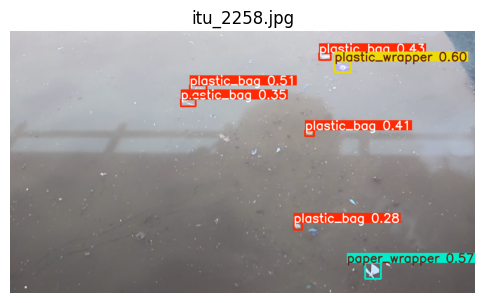


image 1/1 /kaggle/working/keras-yolo3-attention/data/images/val/itu_1280.jpg: 256x416 1 plastic_bag, 6.7ms
Speed: 1.3ms preprocess, 6.7ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 416)


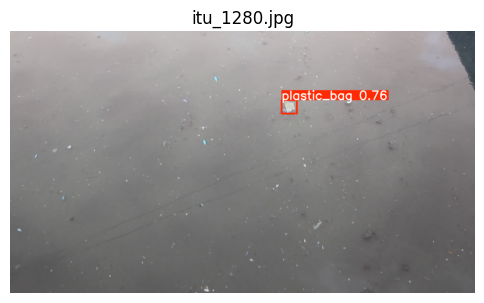


image 1/1 /kaggle/working/keras-yolo3-attention/data/images/val/artificial_2729.jpg: 256x416 3 plastic_bags, 1 plastic_wrapper, 7.0ms
Speed: 1.5ms preprocess, 7.0ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 416)


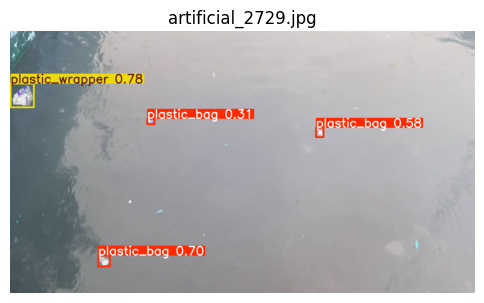


image 1/1 /kaggle/working/keras-yolo3-attention/data/images/val/itu_4633.jpg: 256x416 1 plastic_bag, 1 plastic_wrapper, 6.7ms
Speed: 1.7ms preprocess, 6.7ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 416)


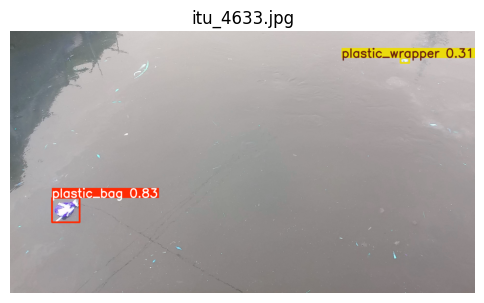


image 1/1 /kaggle/working/keras-yolo3-attention/data/images/val/itu_275.jpg: 256x416 7 plastic_bags, 9 plastic_wrappers, 2 tetrapaks, 7.2ms
Speed: 1.3ms preprocess, 7.2ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 416)


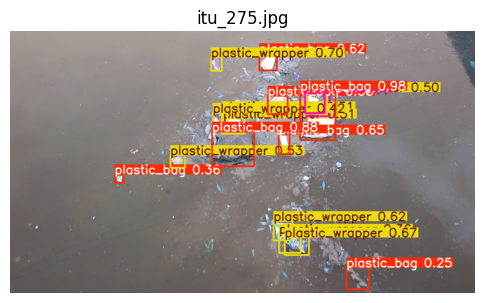

In [17]:
# # Cell 11: validation metrics + sample inference
# import random
# import matplotlib.pyplot as plt
# from pathlib import Path

# # 1) Validation metrics
# metrics = model.val()  
# print(f"mAP@0.5 = {metrics.box.map50:.3f}")

# # 2) Quick inference on up to 5 random val images
# val_dir = Path('data/images/val')
# val_imgs = list(val_dir.glob('*.jpg'))
# if not val_imgs:
#     print(f"No images found in {val_dir}")
# else:
#     for img_path in random.sample(val_imgs, min(5, len(val_imgs))):
#         result = model.predict(str(img_path), conf=0.25)[0]
#         plt.figure(figsize=(6,6))
#         plt.imshow(result.plot())
#         plt.axis('off')
#         plt.title(img_path.name)
#         plt.show()

import warnings
from pathlib import Path
import random
import numpy as np
import matplotlib.pyplot as plt

# 1) Validation metrics
metrics = model.val()  
print(f"mAP@0.5 = {metrics.box.map50:.3f}")

# 2) Quick inference on up to 5 random val images
# point to wherever your .jpgs actually live:
val_dir = Path('/kaggle/working/keras-yolo3-attention/data/images/val')   # or Path('data/images/val') if you used that
val_imgs = list(val_dir.glob('*.jpg'))

n_plot = min(len(val_imgs), 5)
if n_plot == 0:
    print(f"No validation images found in {val_dir} to display.")
else:
    warnings.filterwarnings("ignore", category=RuntimeWarning)
    for img_path in random.sample(val_imgs, n_plot):
        result = model.predict(str(img_path), conf=0.25)[0]
        arr = result.plot()

        # clean up any NaNs/Infs and clip into [0,255]
        arr = np.nan_to_num(arr, nan=0.0, posinf=255.0, neginf=0.0)
        arr = np.clip(arr, 0, 255).astype(np.uint8)

        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            plt.figure(figsize=(6,6))
            plt.imshow(arr)
            plt.axis('off')
            plt.title(img_path.name)
            plt.show()



In [18]:
!zip -r runs.zip runs


updating: runs/ (stored 0%)
updating: runs/train/ (stored 0%)
updating: runs/train/garbage_v8n2/ (stored 0%)
updating: runs/train/garbage_v8n2/val_batch1_pred.jpg (deflated 17%)
updating: runs/train/garbage_v8n2/confusion_matrix.png (deflated 19%)
updating: runs/train/garbage_v8n2/val_batch0_labels.jpg (deflated 20%)
updating: runs/train/garbage_v8n2/val_batch0_pred.jpg (deflated 21%)
updating: runs/train/garbage_v8n2/PR_curve.png (deflated 7%)
updating: runs/train/garbage_v8n2/P_curve.png (deflated 5%)
updating: runs/train/garbage_v8n2/val_batch2_pred.jpg (deflated 15%)
updating: runs/train/garbage_v8n2/R_curve.png (deflated 5%)
updating: runs/train/garbage_v8n2/F1_curve.png (deflated 4%)
updating: runs/train/garbage_v8n2/confusion_matrix_normalized.png (deflated 17%)
updating: runs/train/garbage_v8n2/val_batch1_labels.jpg (deflated 17%)
updating: runs/train/garbage_v8n2/val_batch2_labels.jpg (deflated 17%)
updating: runs/train/garbage_v8n/ (stored 0%)
updating: runs/train/garbage_v8n